In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
data1=pd.read_csv("happiness_index.csv")

In [3]:
data1

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
data1.drop(['Region','Country'],axis='columns',inplace=True)

In [5]:
data1

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [6]:
data1.isnull().sum()

Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [7]:
data2=data1.head(10)

In [8]:
data2

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [9]:
data2.columns

Index(['Happiness Rank', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

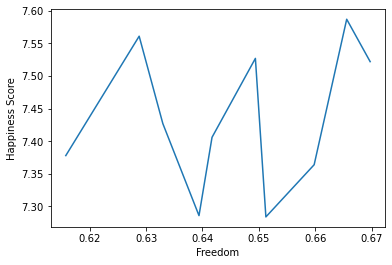

In [10]:
sns.lineplot(x=data2["Freedom"],y=data2["Happiness Score"],data=data2)
plt.show()
#the below graph shows that Happiness Score increases with Freedom

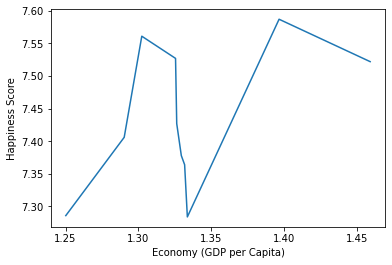

In [11]:
sns.lineplot(x=data2["Economy (GDP per Capita)"],y=data2["Happiness Score"],data=data2)
plt.show()
#the below graph shows that Economy and Happiness Score depends upone each other

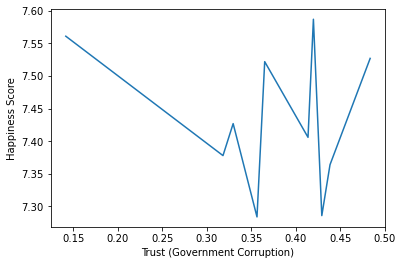

In [12]:
sns.lineplot(x=data2["Trust (Government Corruption)"],y=data2["Happiness Score"],data=data2)
plt.show()
#the below graph shows that countries with less corruption are likely to be getting high Happiness Score

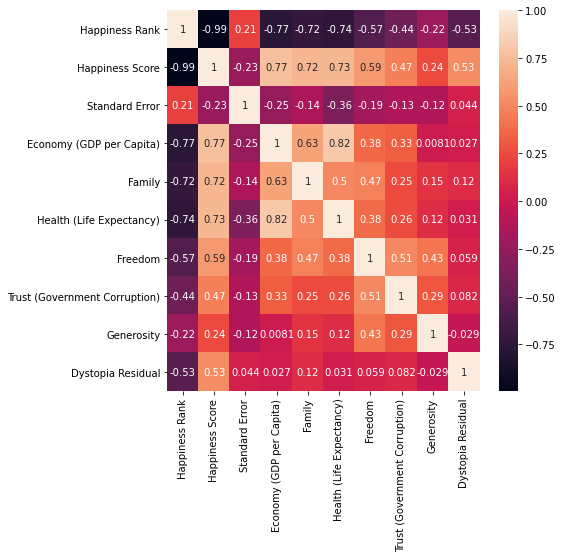

In [27]:
# correlation heatmap
corr_hmap=data.corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [13]:
data1

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [14]:
from scipy.stats import zscore
z=np.abs(zscore(data1))
threshold=3
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([7, 2, 2, 2, 8, 4, 7, 9, 4], dtype=int64))


In [15]:
data_new=data1[(z<3).all(axis=1)] 

In [16]:
print(data1.shape)
print(data_new.shape)

(158, 10)
(149, 10)


In [17]:
data=data_new
data.shape

(149, 10)

In [18]:
data.skew()

Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

In [19]:
for col in data.columns:
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])


In [20]:
data.skew()

Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   1.193808
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.095190
Generosity                       0.433539
Dystopia Residual               -0.021144
dtype: float64

In [21]:
data1=data.drop(columns=['Happiness Rank'])
x=data1
y=data['Happiness Rank']

In [22]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
max_r_score=0
for r_state in range(37,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state,"is",max_r_score)

max r2 score corresponding to 39 is 0.9928262143423776


In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=39,test_size=0.20)
lreg=linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [24]:

print("r2 score is:",r2_score(y_test,y_pred))
print("RMSE is:",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is: 0.9928262143423776
RMSE is: 4.043011365603236


In [25]:
#cross validation
from sklearn.model_selection import cross_val_score

lrscores=cross_val_score(lreg,x,y,cv=5)
print(lrscores)
print(lrscores.mean(),lrscores.std())

[-1.07686583  0.34496399  0.6052727   0.62666683  0.30619879]
0.16124729485483372 0.6326864601576305


In [26]:
 import joblib
joblib.dump(lreg,'Happiness_index.pkl')

['Happiness_index.pkl']